## Data Preprocessing

In [2]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'Annual GDP.csv'
gdp_data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
gdp_data.head(), gdp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes


(   Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                       15,108,806                    5.6   
 1  2022                       13,489,642                    4.9   
 2  2021                       12,027,662                    7.6   
 3  2020                       10,715,070                   -0.3   
 4  2019                       10,237,727                    5.1   
 
   Real GDP prices (Ksh Million)  
 0                    10,399,980  
 1                     9,852,583  
 2                     9,395,942  
 3                     8,733,060  
 4                     8,756,946  ,
 None)

In [4]:
# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Confirm changes by displaying the updated data types and first few rows
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


(   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                        15108806.0                    5.6   
 1  2022                        13489642.0                    4.9   
 2  2021                        12027662.0                    7.6   
 3  2020                        10715070.0                   -0.3   
 4  2019                        10237727.0                    5.1   
 
    Real GDP prices (Ksh Million)  
 0                     10399980.0  
 1                      9852583.0  
 2                      9395942.0  
 3                      8733060.0  
 4                      8756946.0  ,
 None)

## visualizing trends in GDP over time

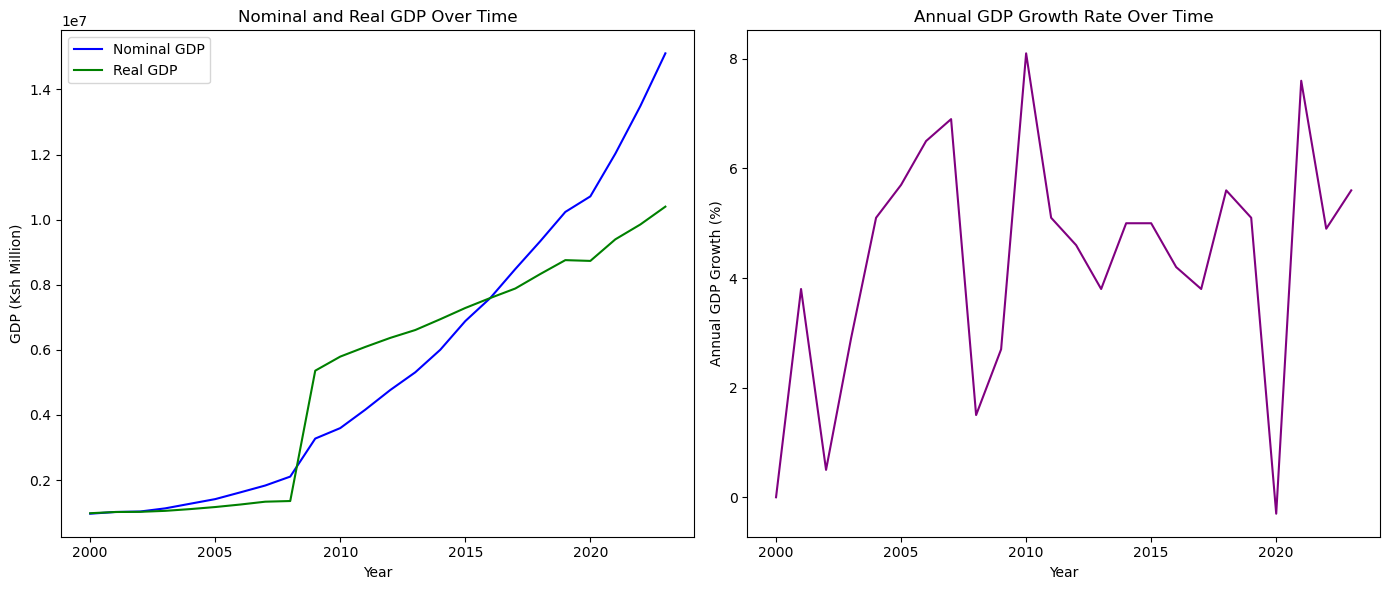

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and axes for multiple plots
plt.figure(figsize=(14, 6))

# Plot Nominal and Real GDP over time
plt.subplot(1, 2, 1)
plt.plot(gdp_data['Year'], gdp_data['Nominal GDP prices (Ksh Million)'], label="Nominal GDP", color="blue")
plt.plot(gdp_data['Year'], gdp_data['Real GDP prices (Ksh Million)'], label="Real GDP", color="green")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.title("Nominal and Real GDP Over Time")
plt.legend()

# Plot Annual GDP growth rate over time
plt.subplot(1, 2, 2)
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], color="purple")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Annual GDP Growth Rate Over Time")

plt.tight_layout()
plt.show()

Nominal and Real GDP Over Time: This plot shows the increasing trend in both nominal and real GDP over the years, with nominal GDP (in blue) generally higher than real GDP (in green) due to inflation.

Annual GDP Growth Rate Over Time: This plot reveals fluctuations in GDP growth. There are noticeable peaks and troughs, indicating periods of rapid economic growth and potential economic challenges.

# Step 1: Create Lagged Features and Moving Averages

In [11]:
# Creating lagged features and moving averages for GDP

# Add lagged features for Nominal and Real GDP, and Annual GDP growth (using the previous year’s values)
gdp_data['Nominal GDP Lagged (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lagged (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)
gdp_data['GDP Growth Lagged (%)'] = gdp_data['Annual GDP growth (%)'].shift(1)

# Create 3-year moving averages for nominal GDP, real GDP, and annual growth
gdp_data['Nominal GDP 3yr MA'] = gdp_data['Nominal GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['Real GDP 3yr MA'] = gdp_data['Real GDP prices (Ksh Million)'].rolling(window=3).mean()
gdp_data['GDP Growth 3yr MA (%)'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Display the updated dataset to confirm new features
gdp_data.head(10)

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),Nominal GDP Lagged (Ksh Million),Real GDP Lagged (Ksh Million),GDP Growth Lagged (%),Nominal GDP 3yr MA,Real GDP 3yr MA,GDP Growth 3yr MA (%)
0,2023,15108806.0,5.6,10399980.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,13489642.0,4.9,9852583.0,15108806.0,10399980.0,5.6,NaN,NaN,NaN
2,2021,12027662.0,7.6,9395942.0,13489642.0,9852583.0,4.9,1.354204e+07,9.882835e+06,6.033333
3,2020,10715070.0,-0.3,8733060.0,12027662.0,9395942.0,7.6,1.207746e+07,9.327195e+06,4.066667
4,2019,10237727.0,5.1,8756946.0,10715070.0,8733060.0,-0.3,1.099349e+07,8.961983e+06,4.133333
5,2018,9340307.0,5.6,8330891.0,10237727.0,8756946.0,5.1,1.009770e+07,8.606966e+06,3.466667
6,2017,8483396.0,3.8,7885521.0,9340307.0,8330891.0,5.6,9.353810e+06,8.324453e+06,4.833333
7,2016,7594064.0,4.2,7594064.0,8483396.0,7885521.0,3.8,8.472589e+06,7.936825e+06,4.533333
8,2015,6884317.0,5.0,7287024.0,7594064.0,7594064.0,4.2,7.653926e+06,7.588870e+06,4.333333
9,2014,6003835.0,5.0,6942157.0,6884317.0,7287024.0,5.0,6.827405e+06,7.274415e+06,4.733333


# setting up the decision tree

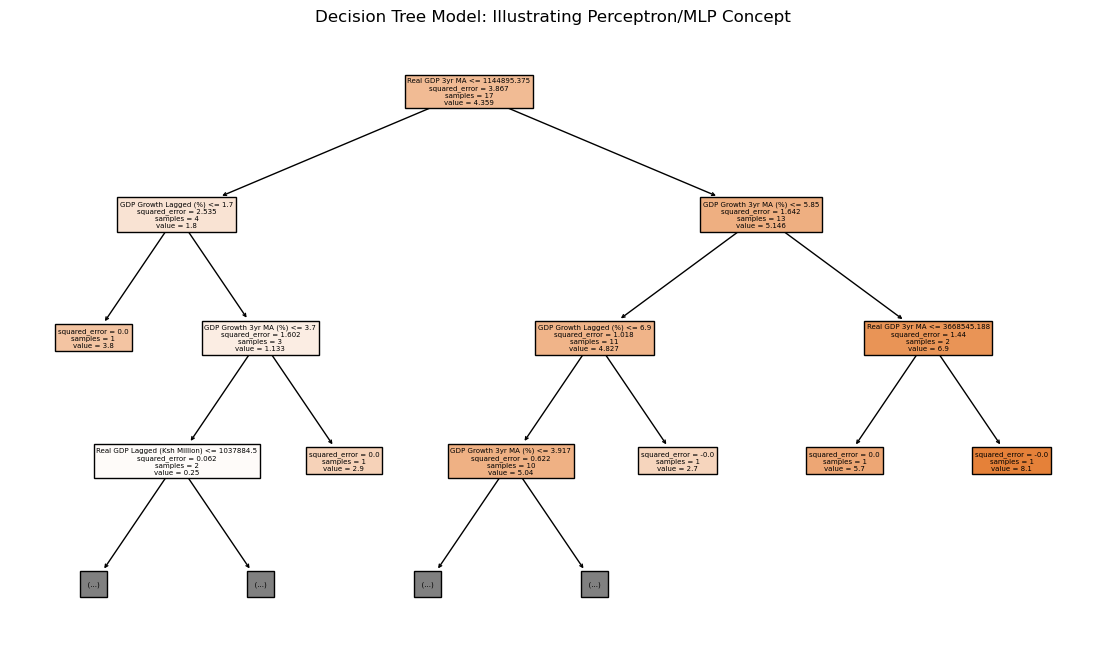

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Selecting features (lagged values and moving averages) and target (current GDP growth)
features = [
    'Nominal GDP Lagged (Ksh Million)', 'Real GDP Lagged (Ksh Million)', 'GDP Growth Lagged (%)',
    'Nominal GDP 3yr MA', 'Real GDP 3yr MA', 'GDP Growth 3yr MA (%)'
]
target = 'Annual GDP growth (%)'

# Drop rows with NaN values (from lagging and rolling calculations) to ensure clean data for training
gdp_data_cleaned = gdp_data.dropna()

# Splitting the data into training and testing sets
X = gdp_data_cleaned[features]
y = gdp_data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Visualize the decision tree to illustrate the concept
plt.figure(figsize=(14, 8))
plot_tree(decision_tree, feature_names=features, filled=True, max_depth=3)
plt.title("Decision Tree Model: Illustrating Perceptron/MLP Concept")
plt.show()

# Setting Up the RNN

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Select the target (Annual GDP growth) and features related to GDP
# Using 3 years of historical data (lagged and moving average) for the RNN
sequence_length = 3  # Number of past years to look back for each prediction

# Prepare data for RNN
# We need to reshape the data to create sequences of features for each year
sequences = []
targets = []

for i in range(len(gdp_data_cleaned) - sequence_length):
    sequences.append(gdp_data_cleaned[features].iloc[i:i + sequence_length].values)
    targets.append(gdp_data_cleaned[target].iloc[i + sequence_length])

# Convert lists to numpy arrays
X_rnn = np.array(sequences)
y_rnn = np.array(targets)

# Split the reshaped data into training and testing sets
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Define and build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))  # Output layer for regression

# Compile the RNN model
model.compile(optimizer='adam', loss='mse')

# Display the model summary to understand its structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2850      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2901 (11.33 KB)
Trainable params: 2901 (11.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



1. **SimpleRNN Layer**:
   - This layer has 50 units, meaning it outputs a sequence of 50 features after processing each input sequence. It has 2,850 trainable parameters.
   
2. **Dense Layer**:
   - This is the output layer with a single unit, suitable for regression, to predict GDP growth. It adds 51 parameters.

### Next Steps
To train the RNN model:

1. **Fit the model** on the training data (`X_train_rnn` and `y_train_rnn`) for a certain number of epochs, monitoring the model’s loss on the test data (`X_test_rnn` and `y_test_rnn`).
2. **Evaluate the Model**: After training, you can evaluate the model’s performance on the test set to see how well it predicts future explore next?

Epoch 1/1000
8/8 [==============================] - 2s 43ms/step - loss: 38978992472064.0000 - val_loss: 43868493971456.0000
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 6875608776704.0000 - val_loss: 2132035633152.0000
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 406177087488.0000 - val_loss: 1816566693888.0000
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 1404338176000.0000 - val_loss: 2185115074560.0000
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 920513282048.0000 - val_loss: 212204126208.0000
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 71479861248.0000 - val_loss: 253300736000.0000
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 68668256256.0000 - val_loss: 542901633024.0000
Epoch 8/1000
8/8 [==============================] - 0s 8ms/step - loss: 87661084672.0000 - val_loss: 307825082368.0000
Epoch 9/1000
8/8 [===============

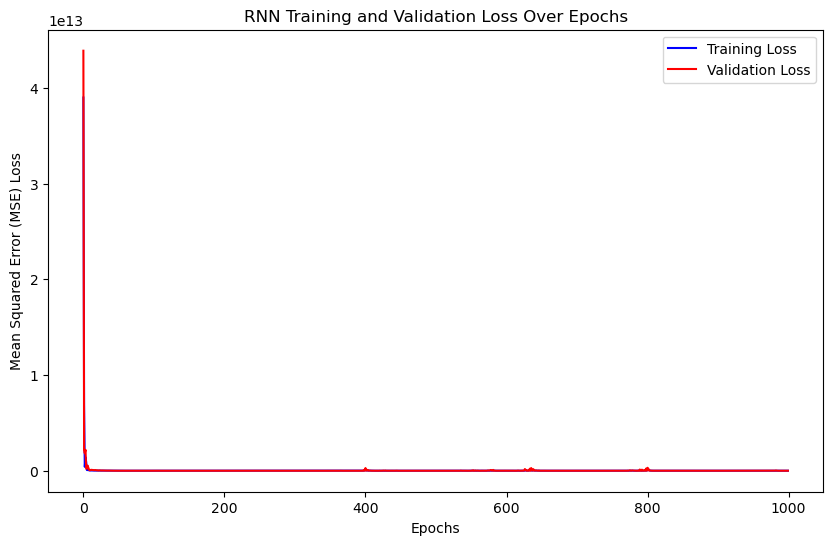

1/1 [==============================] - 0s 327ms/step
Test RMSE: 36131.76952906499


In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Train the RNN model for 1000 epochs
history = model.fit(X_train_rnn, y_train_rnn, epochs=1000, batch_size=2, validation_data=(X_test_rnn, y_test_rnn), verbose=1)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("RNN Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Predict on the test set and calculate the RMSE
y_pred_rnn = model.predict(X_test_rnn)
rmse = sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
print("Test RMSE:", rmse)

## LSTM, (more of improved accuracy💯)

Epoch 1/1000
4/4 [==============================] - 3s 114ms/step - loss: 2339063988224.0000 - val_loss: 1634311340032.0000
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 941025591296.0000 - val_loss: 1271549001728.0000
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 1143764549632.0000 - val_loss: 546057781248.0000
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 1131110989824.0000 - val_loss: 148969586688.0000
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 2274482716672.0000 - val_loss: 670497767424.0000
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 1753765642240.0000 - val_loss: 1902090256384.0000
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 1324990201856.0000 - val_loss: 1992846606336.0000
Epoch 8/1000
4/4 [==============================] - 0s 15ms/step - loss: 594146426880.0000 - val_loss: 1179544977408.0000
Epoch 9/1000
4/4 [==

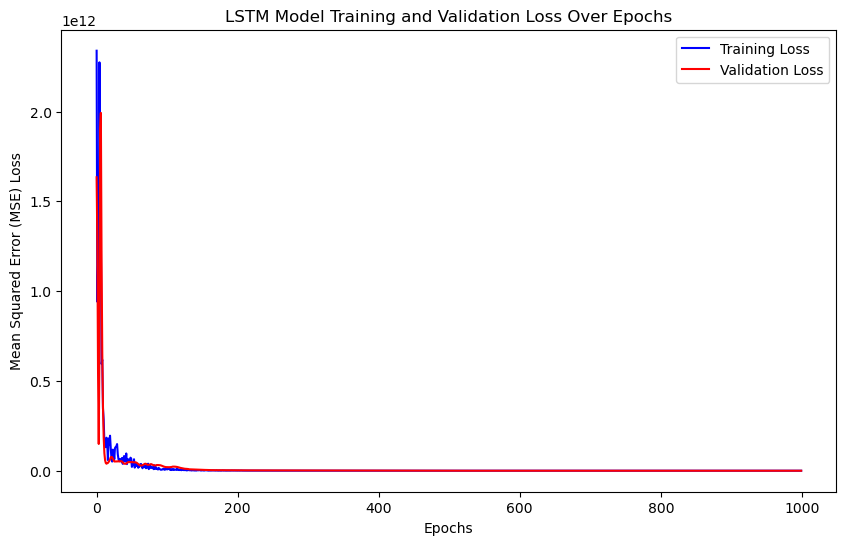

1/1 [==============================] - 0s 307ms/step
Test RMSE for LSTM Model: 5448.081674111637


In [23]:
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Redefine the model with LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(features))))
lstm_model.add(Dropout(0.2))  # Add dropout for regularization
lstm_model.add(Dense(1))  # Output layer for regression

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_rnn, y_train_rnn, epochs=1000, batch_size=4, validation_data=(X_test_rnn, y_test_rnn), verbose=1)

# Plot training and validation loss for LSTM model
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("LSTM Model Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Predict on the test set and calculate RMSE for LSTM model
y_pred_lstm = lstm_model.predict(X_test_rnn)
rmse_lstm = sqrt(mean_squared_error(y_test_rnn, y_pred_lstm))
print("Test RMSE for LSTM Model:", rmse_lstm)

## Improved LSTM Model 💯✅

In [47]:
import pandas as pd

# Load the dataset
file_path = 'Annual GDP.csv'
data = pd.read_csv(file_path)

# Display the first few rows and data types to understand the structure
data_info = data.info()
data_head = data.head()

data_info, data_head


# Remove commas and convert columns to numeric
data['Nominal GDP prices (Ksh Million)'] = data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
data['Real GDP prices (Ksh Million)'] = data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Verify that the data types are now numeric
print(data.dtypes)
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes
Year                                  int64
Nominal GDP prices (Ksh Million)    float64
Annual GDP growth (%)               float64
Real GDP prices (Ksh Million)       float64
dtype: object
   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0  2023                        15108806.0                    5.6   
1  2022                        13489642.0                    4.9   
2  2021                        12027662.0                  